In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## 模擬版資料做 SVM

In [2]:
x = np.array([[6,6],[10,8],[3,7],[8,7]])

In [3]:
x

array([[ 6,  6],
       [10,  8],
       [ 3,  7],
       [ 8,  7]])

In [4]:
x[:,0]

array([ 6, 10,  3,  8])

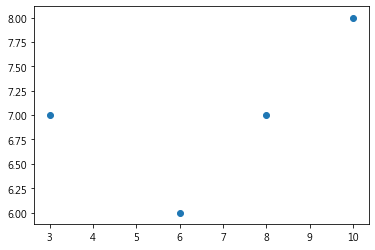

In [5]:
plt.scatter(x[:,0],x[:,1])

In [6]:
y = np.array([1,2,1,2])

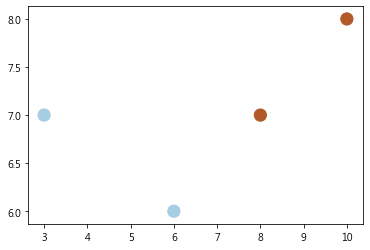

In [9]:
plt.scatter(x[:,0],x[:,1],c=y, cmap='Paired', s = 150)

### Step 1. 打開函數學習機

In [14]:
from sklearn.svm import SVC

In [15]:
clf = SVC()
clf = SVC(gamma='auto')

### Step 2. 學習

In [16]:
clf.fit(x,y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [17]:
clf.fit(x,y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

### Step 3. 預測

In [24]:
y_predict = clf.predict(x)

In [25]:
y_predict

array([1, 2, 1, 2])

In [26]:
y

array([1, 2, 1, 2])

In [27]:
xr = np.random.rand(100)*7+3
yr = np.random.rand(100)*2+6

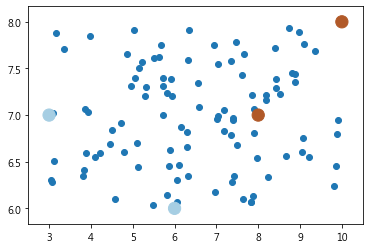

In [29]:
plt.scatter(xr,yr)
plt.scatter(x[:,0],x[:,1],c=y, cmap='Paired', s = 150)

In [47]:
print('X',xr[:5])
print('Y',yr[:5])

X [5.82766572 3.85292028 6.55568916 8.88981946 3.88288618]
Y [7.2342973  7.06003596 7.34738746 7.35611204 6.59098059]


In [48]:
X = np.c_[xr,yr]

In [49]:
Y = clf.predict(X)

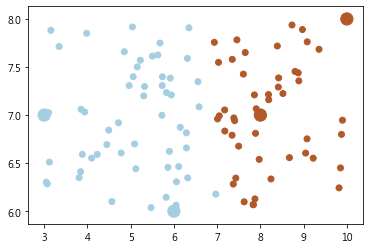

In [50]:
plt.scatter(x[:,0],x[:,1],c=y, cmap='Paired', s = 150)
plt.scatter(X[:,0],X[:,1],c=Y,cmap = 'Paired')

### 結果呈現

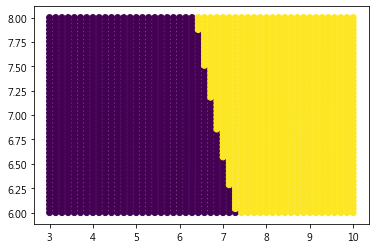

In [59]:
x_list = np.linspace(3,10,50)
y_list = np.linspace(6,8,50)
X,Y = np.meshgrid(x_list,y_list)
P = np.c_[X.ravel(), Y.ravel()]
C = clf.predict(P)
plt.scatter(P[:,0],P[:,1],c=C)

In [52]:
X.ravel()

array([ 3.        ,  3.14285714,  3.28571429, ...,  9.71428571,
        9.85714286, 10.        ])

### 插播：contour 用法
contour 為等高線

In [61]:
xL = np.array([1,2,3,4])
yL = np.array([5,6,7,8])
X,Y = np.meshgrid(xL,yL)

In [62]:
X

array([[1, 2, 3, 4],
       [1, 2, 3, 4],
       [1, 2, 3, 4],
       [1, 2, 3, 4]])

In [63]:
Y

array([[5, 5, 5, 5],
       [6, 6, 6, 6],
       [7, 7, 7, 7],
       [8, 8, 8, 8]])

In [64]:
Z

array([[2, 1, 2, 1],
       [1, 1, 2, 2],
       [1, 1, 2, 1],
       [1, 1, 2, 2]])

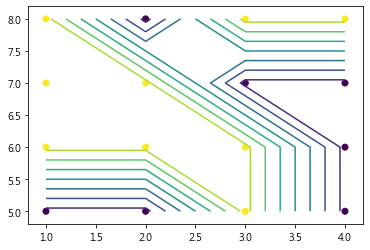

In [65]:
Z = np.random.randint(1,3,(4,4))
plt.contour(X,Y,Z)
plt.scatter(X.ravel(),Y.ravel(),c=Z.ravel())

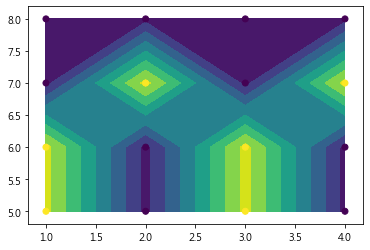

In [66]:
Z = np.random.randint(1,3,(4,4))
plt.contourf(X,Y,Z)
plt.scatter(X.ravel(),Y.ravel(),c=Z.ravel())

### 資料視覺化終極版

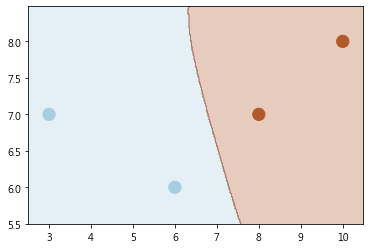

In [71]:
x_arr = np.arange(2.5,10.5,0.02)
y_arr = np.arange(5.5,8.5,0.02)
X,Y = np.meshgrid(x_arr,y_arr)
P =np.c_[X.ravel(),Y.ravel()]
z = clf.predict(P) #可以做contour
Z = z.reshape(X.shape)

plt.contourf(X,Y,Z, cmap='Paired', alpha=0.3) #alpha means transparency
plt.scatter(x[:,0],x[:,1],c=y, cmap='Paired', s=150)

## 鳶尾花數據庫

In [72]:
from sklearn.datasets import load_iris 

In [73]:
iris = load_iris() #讀進來

In [74]:
#print(iris.DESCR)

In [75]:
x = iris.data
y = iris.target #target 輸出

In [77]:
x[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [78]:
y[:5]

array([0, 0, 0, 0, 0])

In [91]:
X = x[:,:2]

In [92]:
Y = y

In [81]:
len(x)

150

### 區分訓練資料、測試資料

In [85]:
from sklearn.model_selection import train_test_split

In [93]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,
                                                   test_size = 0.2,
                                                   random_state = 0)

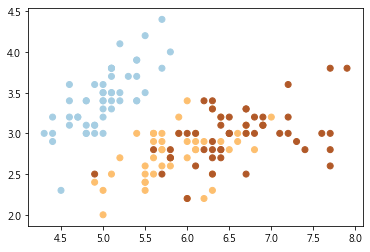

In [94]:
plt.scatter(X[:,0],X[:,1],c=Y, cmap='Paired')

In [90]:
X

array([[ 2.5 ,  2.52,  2.54, ..., 10.44, 10.46, 10.48],
       [ 2.5 ,  2.52,  2.54, ..., 10.44, 10.46, 10.48],
       [ 2.5 ,  2.52,  2.54, ..., 10.44, 10.46, 10.48],
       ...,
       [ 2.5 ,  2.52,  2.54, ..., 10.44, 10.46, 10.48],
       [ 2.5 ,  2.52,  2.54, ..., 10.44, 10.46, 10.48],
       [ 2.5 ,  2.52,  2.54, ..., 10.44, 10.46, 10.48]])

### Step 1. 開一台函數學習機

In [96]:
clf = SVC(gamma = 'auto')

### Step 2. 訓練

In [97]:
clf.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

### Step 3. 預測

In [98]:
y_predict = clf.predict(x_test)

In [99]:
y_predict

array([1, 1, 0, 2, 0, 2, 0, 2, 2, 2, 1, 2, 2, 2, 2, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 2, 0, 0, 2, 1, 0])

In [100]:
y_test

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0])

In [101]:
y_predict-y_test

array([-1,  0,  0,  0,  0,  0,  0,  1,  1,  1, -1,  1,  1,  1,  1,  0,  0,
        0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  1,  0,  0])

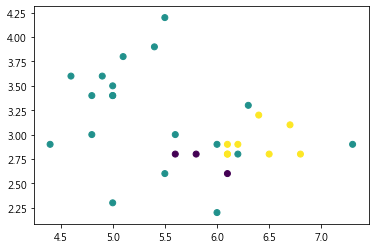

In [103]:
plt.scatter(x_test[:,0],x_test[:,1],c=y_predict-y_test)

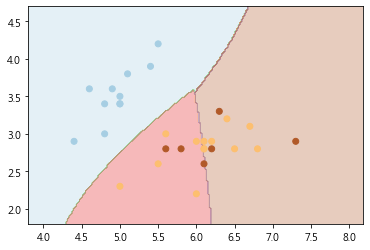

In [106]:
x0 = np.arange(3.8,8.2,0.02)
y0 = np.arange(1.8,4.7,0.02) #每0.02畫一個

xm, ym = np.meshgrid(x0,y0)
P = np.c_[xm.ravel(),ym.ravel()]
z = clf.predict(P) #z 預測

Z = z.reshape(xm.shape)
plt.contourf(xm,ym,Z, cmap='Paired', alpha=0.3)

plt.scatter(x_test[:,0],x_test[:,1],cmap='Paired', c=y_test)

In [ ]:
更好的做法 #1. 試驗後兩個
           2. 四個都要